## Chapter 1

In [1]:
# data file
states <- read.csv('data_files/state.csv')

In [2]:
head(states)
class(states)
# columns are features
# rows are records

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO


[1] "data.frame"

Dataframes are part of the core packages in R. This is different from Python which requires pandas.

### Calculating mean and median

In [3]:
names(states)

[1] "State"        "Population"   "Murder.Rate"  "Abbreviation"

In [4]:
mean(states$Population)

[1] 6162876

In [5]:
# trim mean; 10%
median(states$Population)

[1] 4436370

In [6]:
# Manual calculation of the weighted mean of the murder rate
murdersPerState <- sum(states$Population * states$Murder.Rate / 100)
totalPopulation <- sum(states$Population)
totalMurders <- sum(murdersPerState)
print('Weighted mean of the murder rate')
totalMurders / totalPopulation

[1] "Weighted mean of the murder rate"


[1] 0.04445834

In [7]:
# calculating the weighted mean using matrixStats
library(matrixStats)
weightedMean(states$Murder.Rate, w = states$Population)

Warning message:
“package ‘matrixStats’ was built under R version 3.6.3”

[1] 4.445834

### Estimates of variability

In [18]:
# mean absolute deviation
x <- abs(states$Population - mean(states$Population))
y <- sum(x)
y / 50

[1] 4450933

In [24]:
pop <- states$Population

In [25]:
# sd
sd(pop)

[1] 6848235

In [26]:
# 75th percentile - 25th percentile
IQR(pop)

[1] 4847308

In [27]:
# median absolute deviation from the meadian
mad(pop)

[1] 3849870

### Exploring the data distribution

In [3]:
quantile(states$Murder.Rate, p=c(0.05,0.25,0.5,0.75, 0.95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

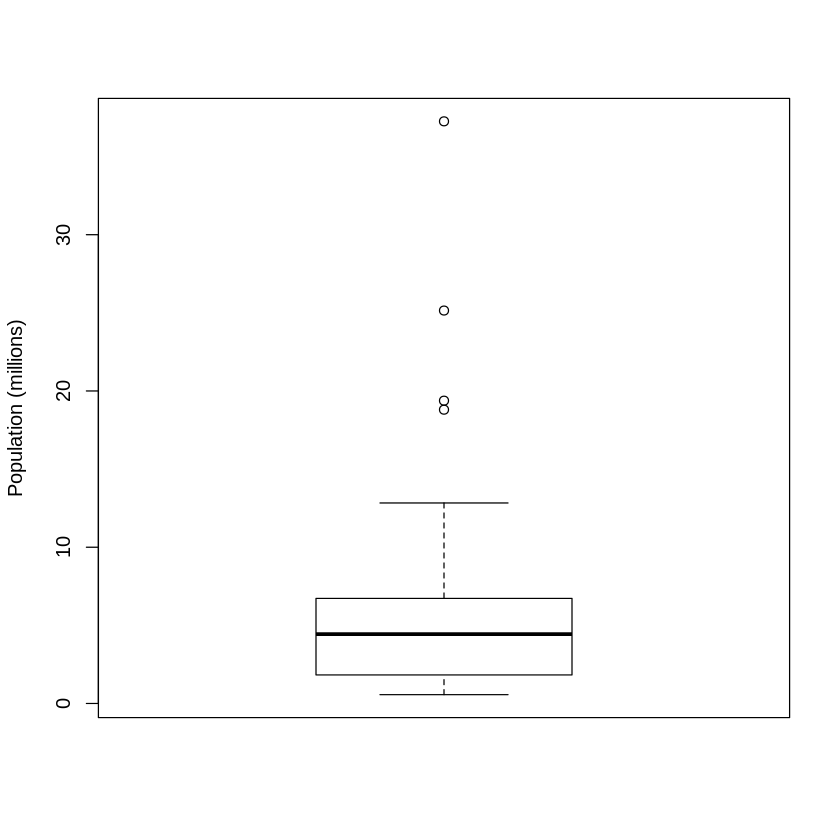

In [5]:
# boxplot for population
boxplot(states$Population/1000000, ylab='Population (millions)')

![title](images/boxplot.png)

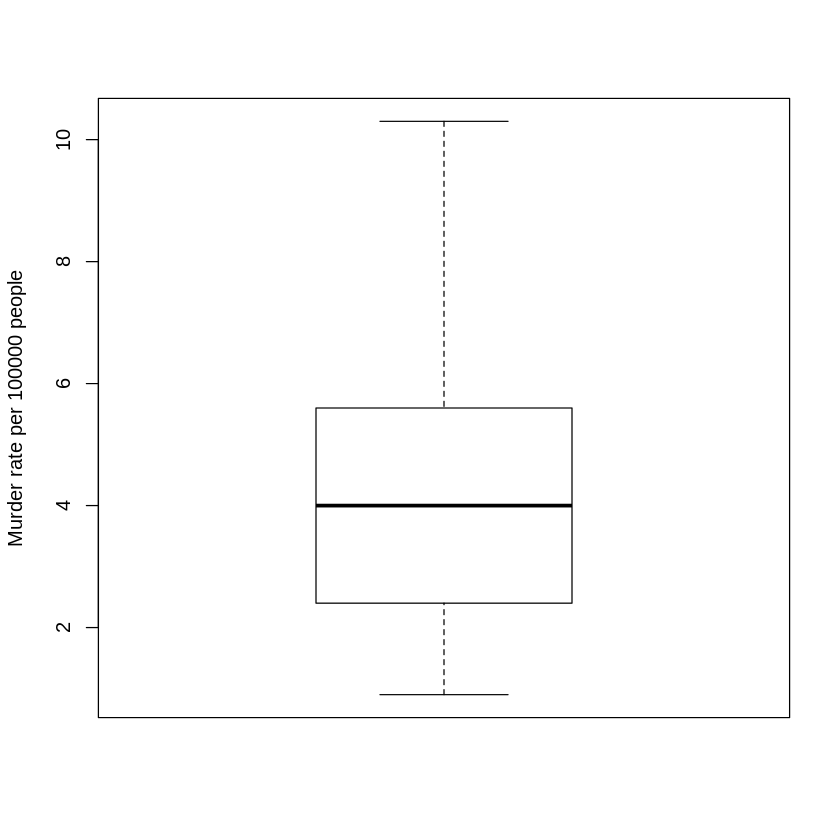

In [6]:
boxplot(states$Murder.Rate, ylab='Murder rate per 100000 people')

In [11]:
# frequency table
breaks <- seq(from=min(states$Population), to=max(states$Population), length = 11)
pop_freq <- cut(states$Population, breaks = breaks, right = TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

In [10]:
breaks

[1]   563626  4232659  7901692 11570725 15239758 18908791 22577824 26246857
 [9] 29915890 33584923 37253956